# PyPEF, lecture 08 (for 2.12.). Pictures in Python. 

Prepared by: Aleksej Gaj ( pythonforstudents24@gmail.com )

🔗 Course website: [https://aleksejalex.4fan.cz/pef_python/](https://aleksejalex.4fan.cz/pef_python/)


In this tutorial we will learn basics of image manipulation in Python, namely:
 - how to open image in Python and what it looks like
 - how to access pixels
 - how to work with color channels
 - some other examples

In [22]:
# imports for today (we are already familiar with those libraries)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
%%capture
%pip install requests 

## Images in Python (OpenCV package)
**(based on video and materials by freeCodeCamp: [here](https://www.youtube.com/watch?v=P4Z8_qe2Cu0))**

<a href="https://opencv.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png" alt="banner" width="150" align="right"></a>
 - package for working with images and generally for **real-time computer vision** tasks
 - = *Open Source Computer Vision Library*
 - originally developed by Intel, later supported by Willow Garage, then Itseez (which was later acquired by Intel)
 - cross-platform & licensed as free and open-source software under Apache License 2
 - Starting in 2011, OpenCV features GPU acceleration for real-time operations

 (The OpenCV logo is composed of the 3 capital letters O, C, V arranged in a triangle. The logo combines several motifs in the spirit of Open Source and Computer Vision.)

Link to webpage of OpenCV:  [https://opencv.org/](https://opencv.org/).

📜 Technical note: naming of this library is a little tricky:
 - if you need to install this library via terminal/pip, you use `pip3 install opencv-python`
 - when importing, you use `import cv2`

In [24]:
# install opencv:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import of library
import cv2 as cv

In [5]:
# download the images we plan to work with:
import requests

url = "https://aleksejalex.4fan.cz/pef_python/img/pef.png"
url2 = "https://aleksejalex.4fan.cz/pef_python/img/red_rat.jpg"

destination = "pef.png"

response = requests.get(url)

if response.status_code == 200:
    with open(destination, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file. Status code:", response.status_code)


File downloaded successfully.


In [6]:
# load image from file and show it:
img_rat = cv.imread("red_rat.jpg")
img = cv.imread("pef.png")

In [7]:
## This is working in script, but not in jupyter environment!!!
#cv.imshow("Image", img)
#cv.waitKey(0)
#cv.destroyAllWindows()

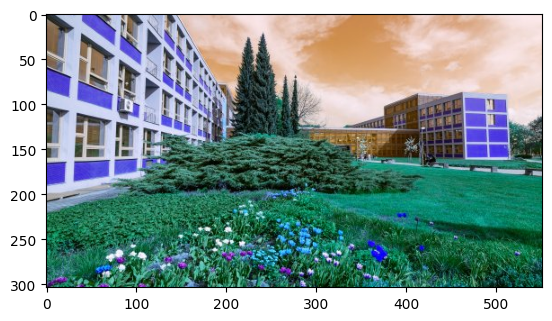

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(img)
plt.show()

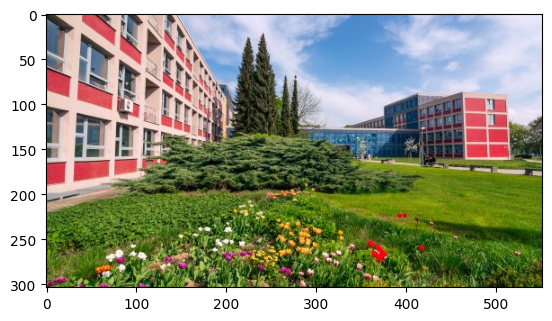

In [9]:
img_converted_to_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_converted_to_RGB)
plt.show()

In [10]:
def convert_bgr_to_rgb(img):
    """converts image from BGR (used by opencv) to RGB (used by matplotlib)"""
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [11]:
rat_rgb = convert_bgr_to_rgb(img)

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(304, 552, 3)

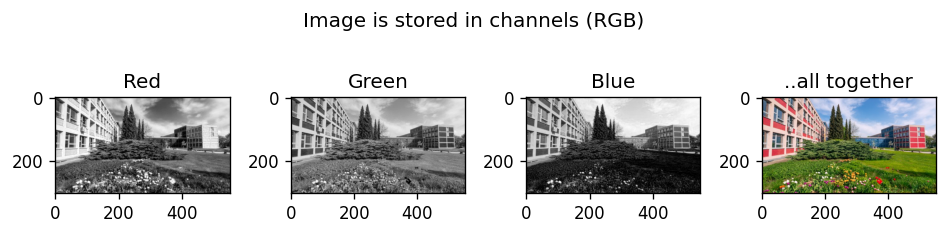

In [14]:
plt.figure(figsize=(8,2), dpi=120)
plt.subplot(1,4,1)
plt.imshow(rat_rgb[:,:,0], cmap='gray')
plt.title('Red')
plt.subplot(1,4,2)
plt.imshow(rat_rgb[:,:,1], cmap='gray')
plt.title('Green')
plt.subplot(1,4,3)
plt.imshow(rat_rgb[:,:,2], cmap='gray')
plt.title('Blue')
plt.subplot(1,4,4)
plt.imshow(rat_rgb[:,:,:])
plt.title('..all together')

plt.suptitle("Image is stored in channels (RGB)")
plt.tight_layout()
plt.show()

### Image by pixels (one more time)

In [15]:
myimg = np.zeros([10,10], dtype=int)
myimg

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

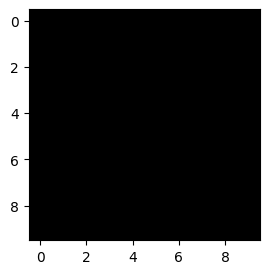

In [16]:
plt.figure(figsize=(3,3))
plt.imshow(myimg, cmap='gray')
plt.show()

In [17]:
myimg[1:5,1:5] = 1
myimg[5:9,5:9] = 1
myimg

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

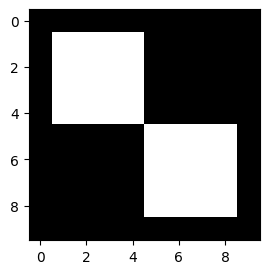

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(myimg, cmap='gray')
plt.show()

In [19]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [20]:
np.zeros((4,2,3))

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

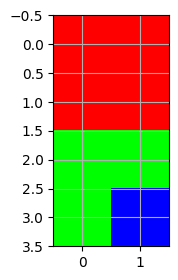

In [21]:
# Create an empty array with shape (10, 10, 3)
image = np.zeros((4, 2, 3), dtype=int)

# Set different colors for different regions of the image
image[:2, :] = [255, 0, 0]    # Red in the left half
image[2:, :] = [0, 255, 0]    # Green in the right half
image[3, 1]  = [0, 0, 255]    # one blue pixel

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.grid()
plt.show()

### 🚀 Bonus: encryptor

 - here: [https://gist.github.com/aleksejalex/1dad3b249ee314f908707a901c1754d7](https://gist.github.com/aleksejalex/1dad3b249ee314f908707a901c1754d7)

